In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [6]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


when working with machine learning tasks directly in python.
when we need a pre-processed dataset without needing toload an external file.
when a dataset is small and already available in the sklearn library.

In [13]:
# Load the iris dataset
iris = load_iris()

# create a dataframe for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
# df['species'] = df['species'].map(species_map)


DEFINE FEATURES(X) AND TARGET(Y)

In [18]:
x = iris.data
y = iris.target

SPLIT DATA TO TRAINING AND TESTING SET

RANDOM_STATE ensures that splits are consistent and reproducible.

STRATIFY ensures class distributions in y(target) are representative in both(train,test) subsets :: used for imbalanced datasets to maintain class distributions in training and testing sets.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

TRAIN LOGISTIC REGRESSION MODEL

LR uses an optimization algo. like Gradient Descent or LIBLINEAR, to minimize a loss fiunction an dfind best-fit parameters. OPtimization process is iterative, max_iter sets an upper limit on how long this process can continue.

If max_iter is low : might see a ConvergenceWarning : optimization algo. might stop before finding the optimal solution.

In [26]:
# initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# fit the model to training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

MAKE PREDICTIONS

In [27]:
# Predict the species for test data
y_pred = model.predict(x_test)

In [28]:
print(y_pred)

[2 1 1 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]


EVALUATE THE MODEL

In [38]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy is: {accuracy:.2f}\n")

# Classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report is : ")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix is : ")
print(cm)



Accuracy is: 0.93


Classification Report is : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Confusion Matrix is : 
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


VISUALIZE CONFUSION MATRIX

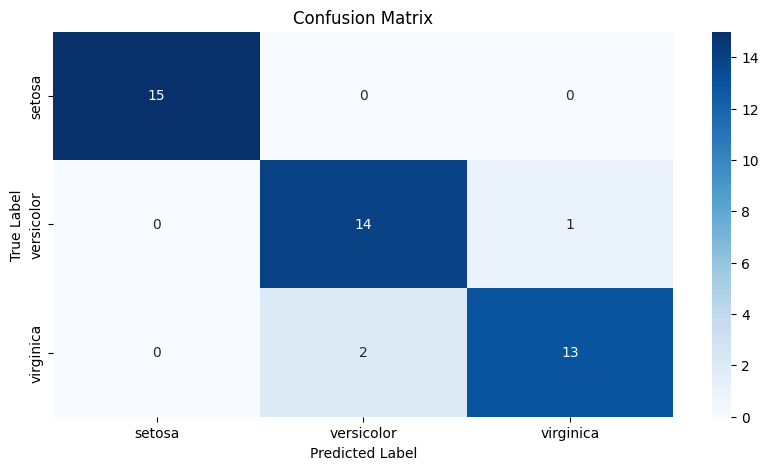

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



TEST ON CUSTOM DATA

In [50]:
sample_data = pd.DataFrame(
    [[7.0, 3.2, 4.7, 1.4]],
    columns=iris.feature_names
)

print(sample_data)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                7.0               3.2                4.7               1.4


MAKE PREDICTION

In [51]:
prediction = model.predict(sample_data.values)
print(f"\nPrediction for sample data: {iris.target_names[prediction[0]]}")


Prediction for sample data: versicolor
